# EE 572 HW1

## Pozar Problem 1.2

(a) From Maxwell's equations, we have

$$\nabla\times\boldsymbol{E} = -\frac{\partial \boldsymbol{B}}{\partial t}$$

Therefore for plane wave at angular frequency $\omega$, we have

$$\boldsymbol{B} = \frac{E_0k}{\omega}\cos(\omega t-kx)\boldsymbol{e}_z$$

(b) Phase velocity of plane wave in a dieletric medium with $\varepsilon_r = 2.54$ is

$$v_p = \frac{c}{\sqrt{\varepsilon_r}} = 1.88\times 10^8\ \rm{m/s}$$

(c) The wavelength of plane wave can be obtained from phase velocity and frequency:

$$\lambda = v_p/f = 7.84\times 10^{-2}\ \rm{m}$$

(d) Phase shift between $x_2$ and $x_1$ is

$$\Delta\phi = \phi_2 - \phi_1 = -k(x_2 - x_1) = 2\pi\cdot(x_2-x_1)/\lambda = 4.01$$

## Pozar Problem 2.4

(a) The expressions for RLGC parameters of a coaxial cable are

\begin{gather}
    R = \frac{1}{2}\sqrt{\frac{f\mu_c}{\pi\sigma_c}}(\frac{1}{a}+\frac{1}{b})\\
    L = \frac{\mu}{2\pi}\log(b/a)\\
    G = \frac{2\pi\sigma}{\log(b/a)}\\
    C = \frac{2\pi\varepsilon}{\log(b/a)}
\end{gather}

where $\sigma_c$, $\mu_c$ pertain to the metal and $\sigma$, $\mu$, $\varepsilon$ pertain to the dieletric medium. For non-magnetic material, we can assume $\mu_c=\mu=\mu_0$, and other parameters can be found in Pozar's Appendix H&G:

\begin{gather}
    \sigma_c = 5.81 \times 10^{7} \ \rm S/m\\
    \varepsilon/\varepsilon_0 = 2.08\\
    \sigma = \varepsilon\omega\tan\delta = 7.37 \times 10^{-5} \ \rm S/m
\end{gather}

Bringing the above parameters back into the expressions for RLGC, we can obatin the corresponding value:

In [41]:
from scipy import constants
import numpy as np
import matplotlib.pyplot as plt

# Constants
f = 1e9
sigma_c = 5.81e7
epsilon = constants.epsilon_0 * 2.08
sigma = 7.37e-5
a = .91e-3
b = 3.02e-3

# Calculate RLGC parameter
R = 1/2 * np.sqrt(f * constants.mu_0 / (np.pi * sigma_c)) * (1/a + 1/b)
L = constants.mu_0 / (2 * np.pi) * np.log(b/a)
G = 2 * np.pi * sigma / np.log(b/a)
C = 2 * np.pi * epsilon / np.log(b/a)

print(f'R={R:.2e} Ohme/m\nL={L:.2e} H/m\nG={G:.2e} 1/Ohme.m\nC={C:.2e} F/m')

R=1.88e+00 Ohme/m
L=2.40e-07 H/m
G=3.86e-04 1/Ohme.m
C=9.65e-11 F/m


Then we can calculate the impedance and attenuation:

In [42]:
# Impedance
Z_0 = np.sqrt(complex(R, 2 * np.pi * f * L) / complex(G, 2 * np.pi * f * C)).real

print(f'Characteristic impedance: {Z_0:.2f} Ohme')

# Attenuation
gamma = np.sqrt(complex(R, 2 * np.pi * f * L) * complex(G, 2 * np.pi * f * C))
energy_loss = 10 * np.log10(np.abs(np.exp(gamma) ** 2))

print(f'Attenuation: {energy_loss:.2f} dB/m')


Characteristic impedance: 49.87 Ohme
Attenuation: 0.25 dB/m


The calculated impedance is very close to the manufacturer's specifications, but the calculated attenuation is smaller. This may be because we only account for the intrinsic losses of the material and ignore the geometric imperfections during the manufacturing process.

(b) The R parameter changes with frequency, therefore by calculating R in the frequency range, we can plot the corresponding attenuation:

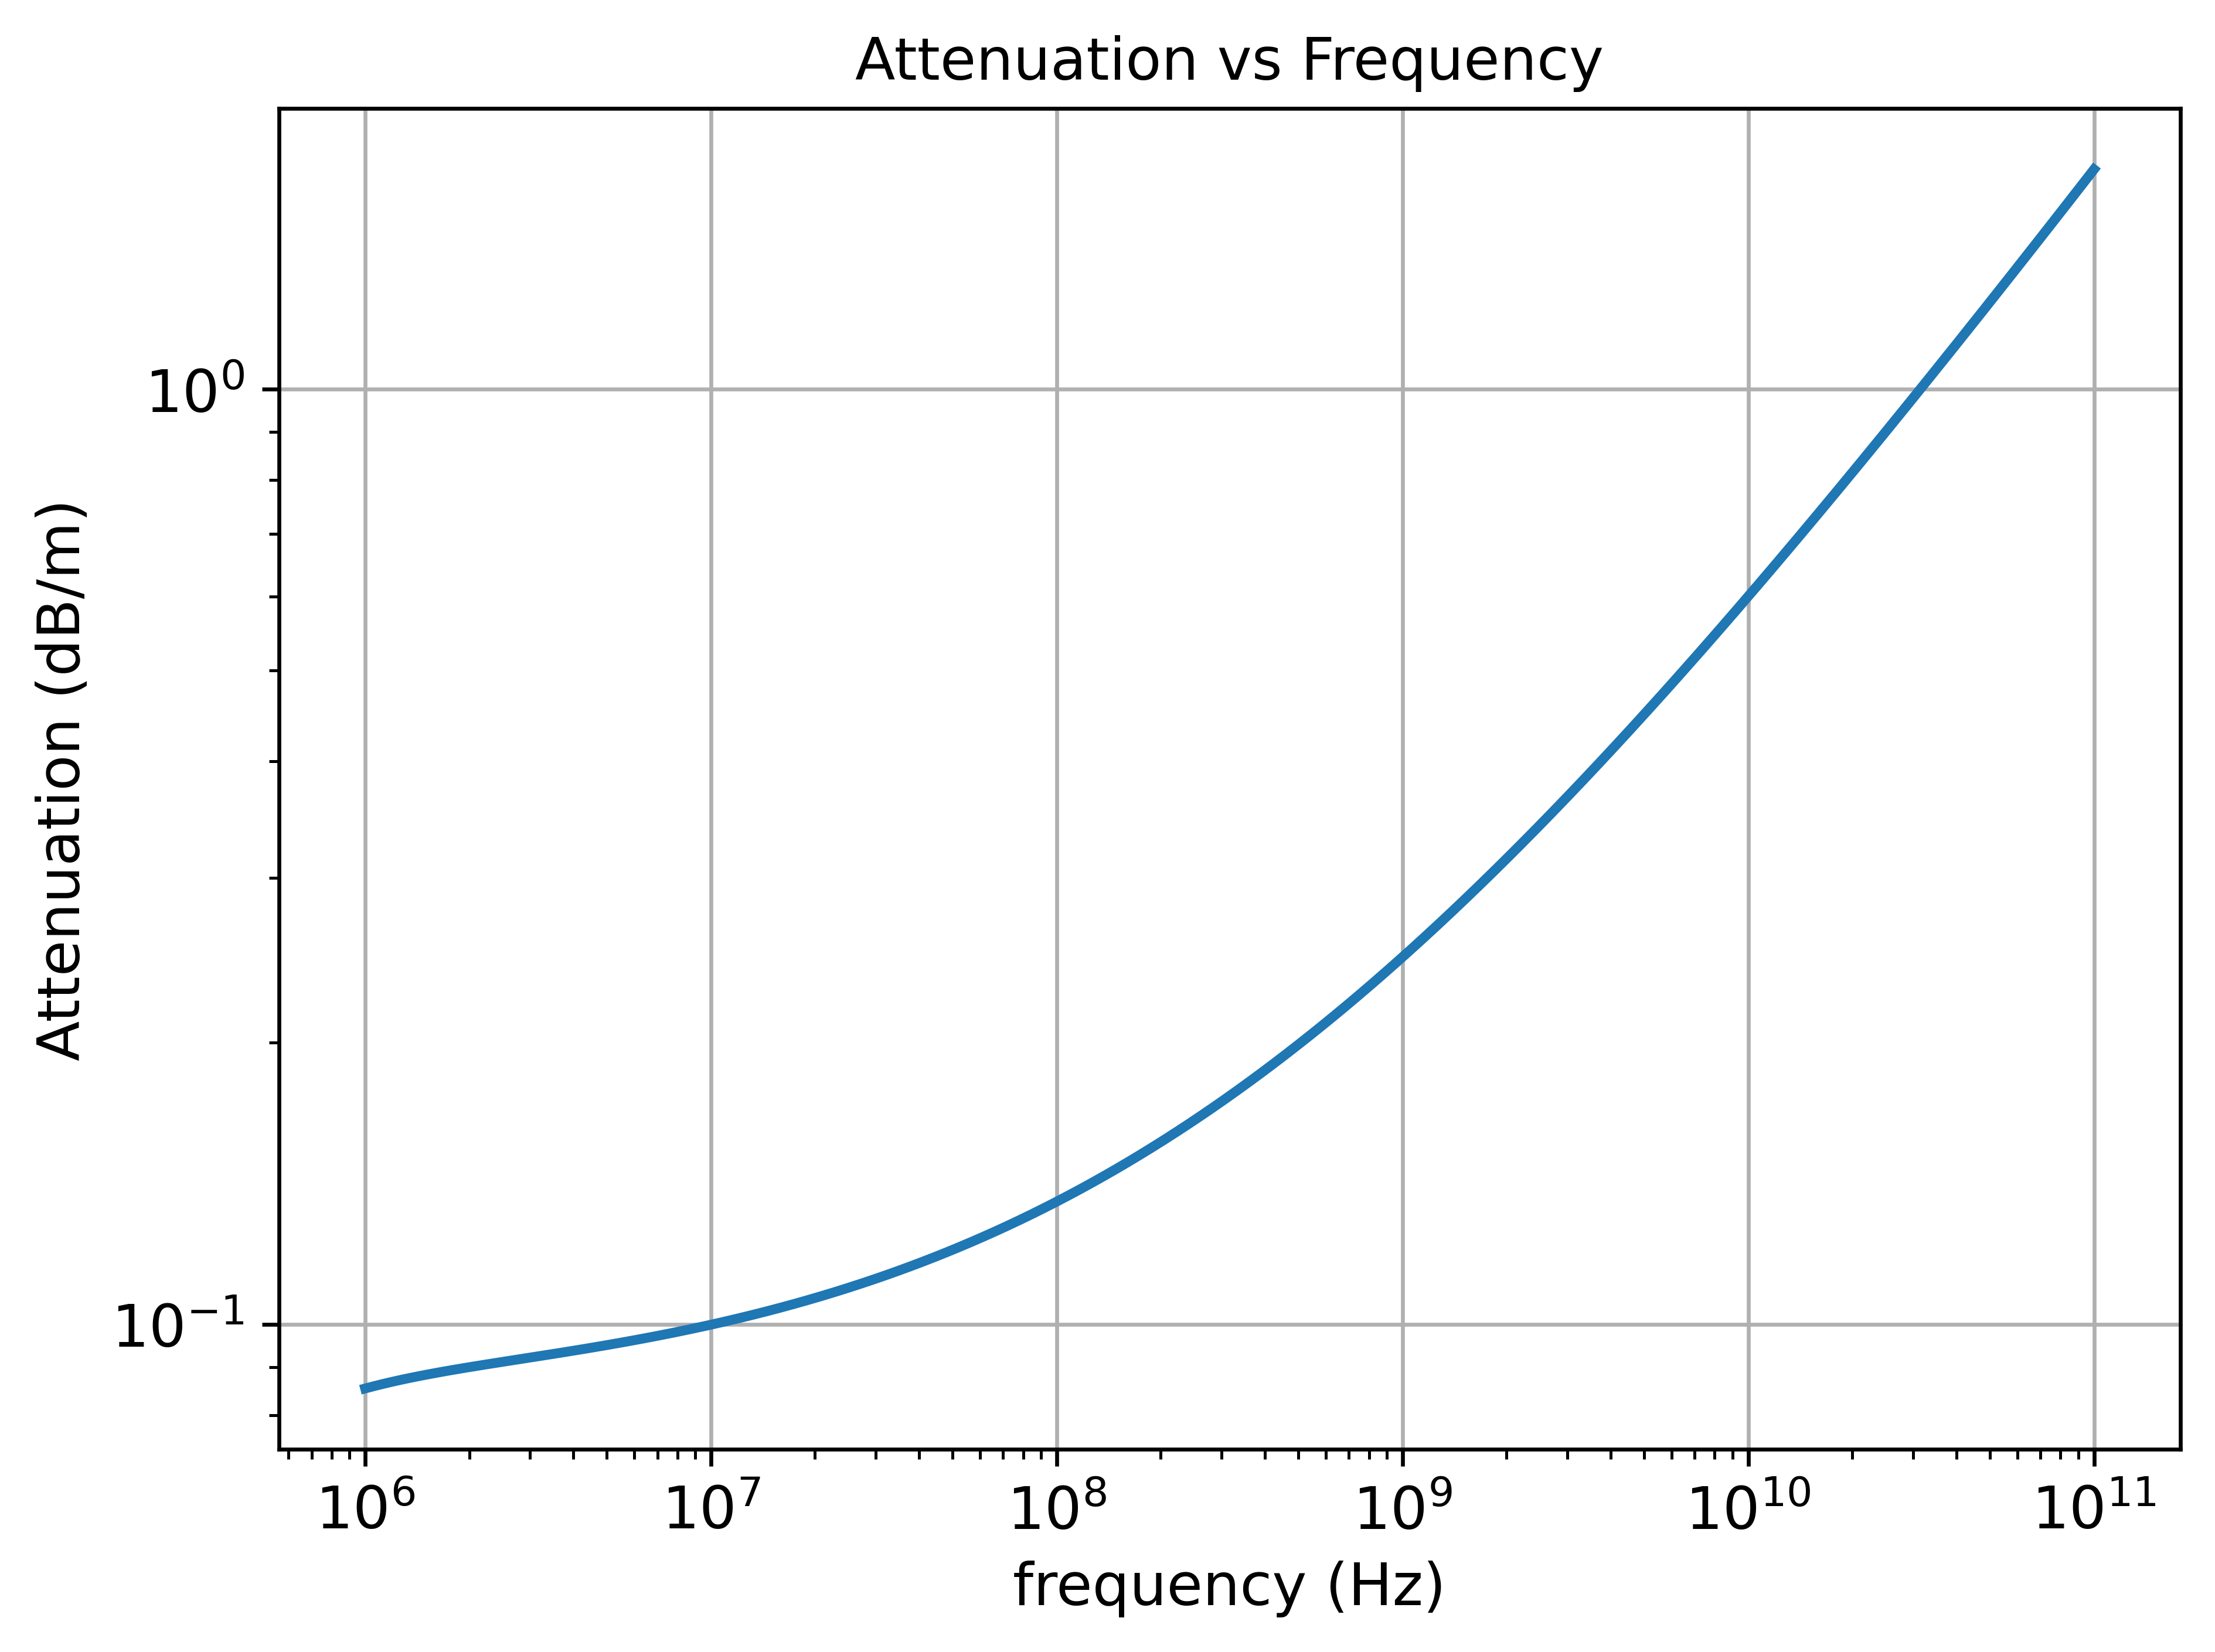

In [43]:
# Frequency range
f_min = 1e6
f_max = 100e9
f_array = np.exp(np.linspace(np.log(f_min), np.log(f_max), 1000))

# R parameter
R_array = 1/2 * np.sqrt(f_array * constants.mu_0 / (np.pi * sigma_c)) * (1/a + 1/b)

# Attenuation
gamma_array = np.sqrt((R_array + 2j * np.pi * f_array * L) * (G + 2j * np.pi * f_array * C))
energy_loss_array = 10 * np.log10(np.abs(np.exp(gamma_array) ** 2))

# Plot
plt.figure(dpi=600)
plt.plot(f_array, energy_loss_array, linewidth=2)
plt.xlabel('frequency (Hz)', fontsize=12)
plt.xscale('log')
plt.xticks(fontsize=12)
plt.ylabel('Attenuation (dB/m)', fontsize=12)
plt.yscale('log')
plt.yticks(fontsize=12)
plt.title('Attenuation vs Frequency', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()


## Pozar Problem 2.19

The voltage and current inside the transmission line can be written in the following general form:

\begin{gather}
    V(z) = V_+ e^{-j\beta z} + V_- e^{j\beta z}\\
    I(z) = \frac{V_+}{Z_0} e^{-j\beta z} -\frac{V_-}{Z_0} e^{j\beta z}
\end{gather}

The tramsimission line terminates at load $Z_L$, therefore the ratio between $V_+$ and $V_-$ can be determined from the reflection coefficient:

\begin{gather}
    \Gamma_L = \frac{Z_L - Z_0}{Z_L+Z_0}\\
    V_- = \Gamma_L V_+
\end{gather}

Hence the voltage and current inside the transmission line are

\begin{gather}
    V(z) = V_+ (e^{-j\beta z} + \Gamma_L e^{j\beta z})\\
    I(z) = \frac{V_+}{Z_0} (e^{-j\beta z} - \Gamma_L e^{j\beta z})
\end{gather}

Therefore we can obtain the voltage and current at the load connected to the generator (we denote this laod as $Z_g$ and the generator voltage as $V_g$):

\begin{gather}
    V(-l) = V_+ (e^{j\beta l} + \Gamma_L e^{-j\beta l})\\
    I(-l) = \frac{V_+}{Z_0} (e^{j\beta l} - \Gamma_L e^{-j\beta l})\\
    V_g - V(-l) = I(-l) \cdot Z_g
\end{gather}

By solving the equations above, we obatin

\begin{gather}
    V_+ = V_g \frac{Z_0}{Z_0 + Z_g}\frac{e^{-j\beta l}}{1- \Gamma_L \Gamma_g e^{-2j\beta l}}
\end{gather}

We calulate $V_+$ in the following python program and plot the magnitude of voltage inside the tranmission line:

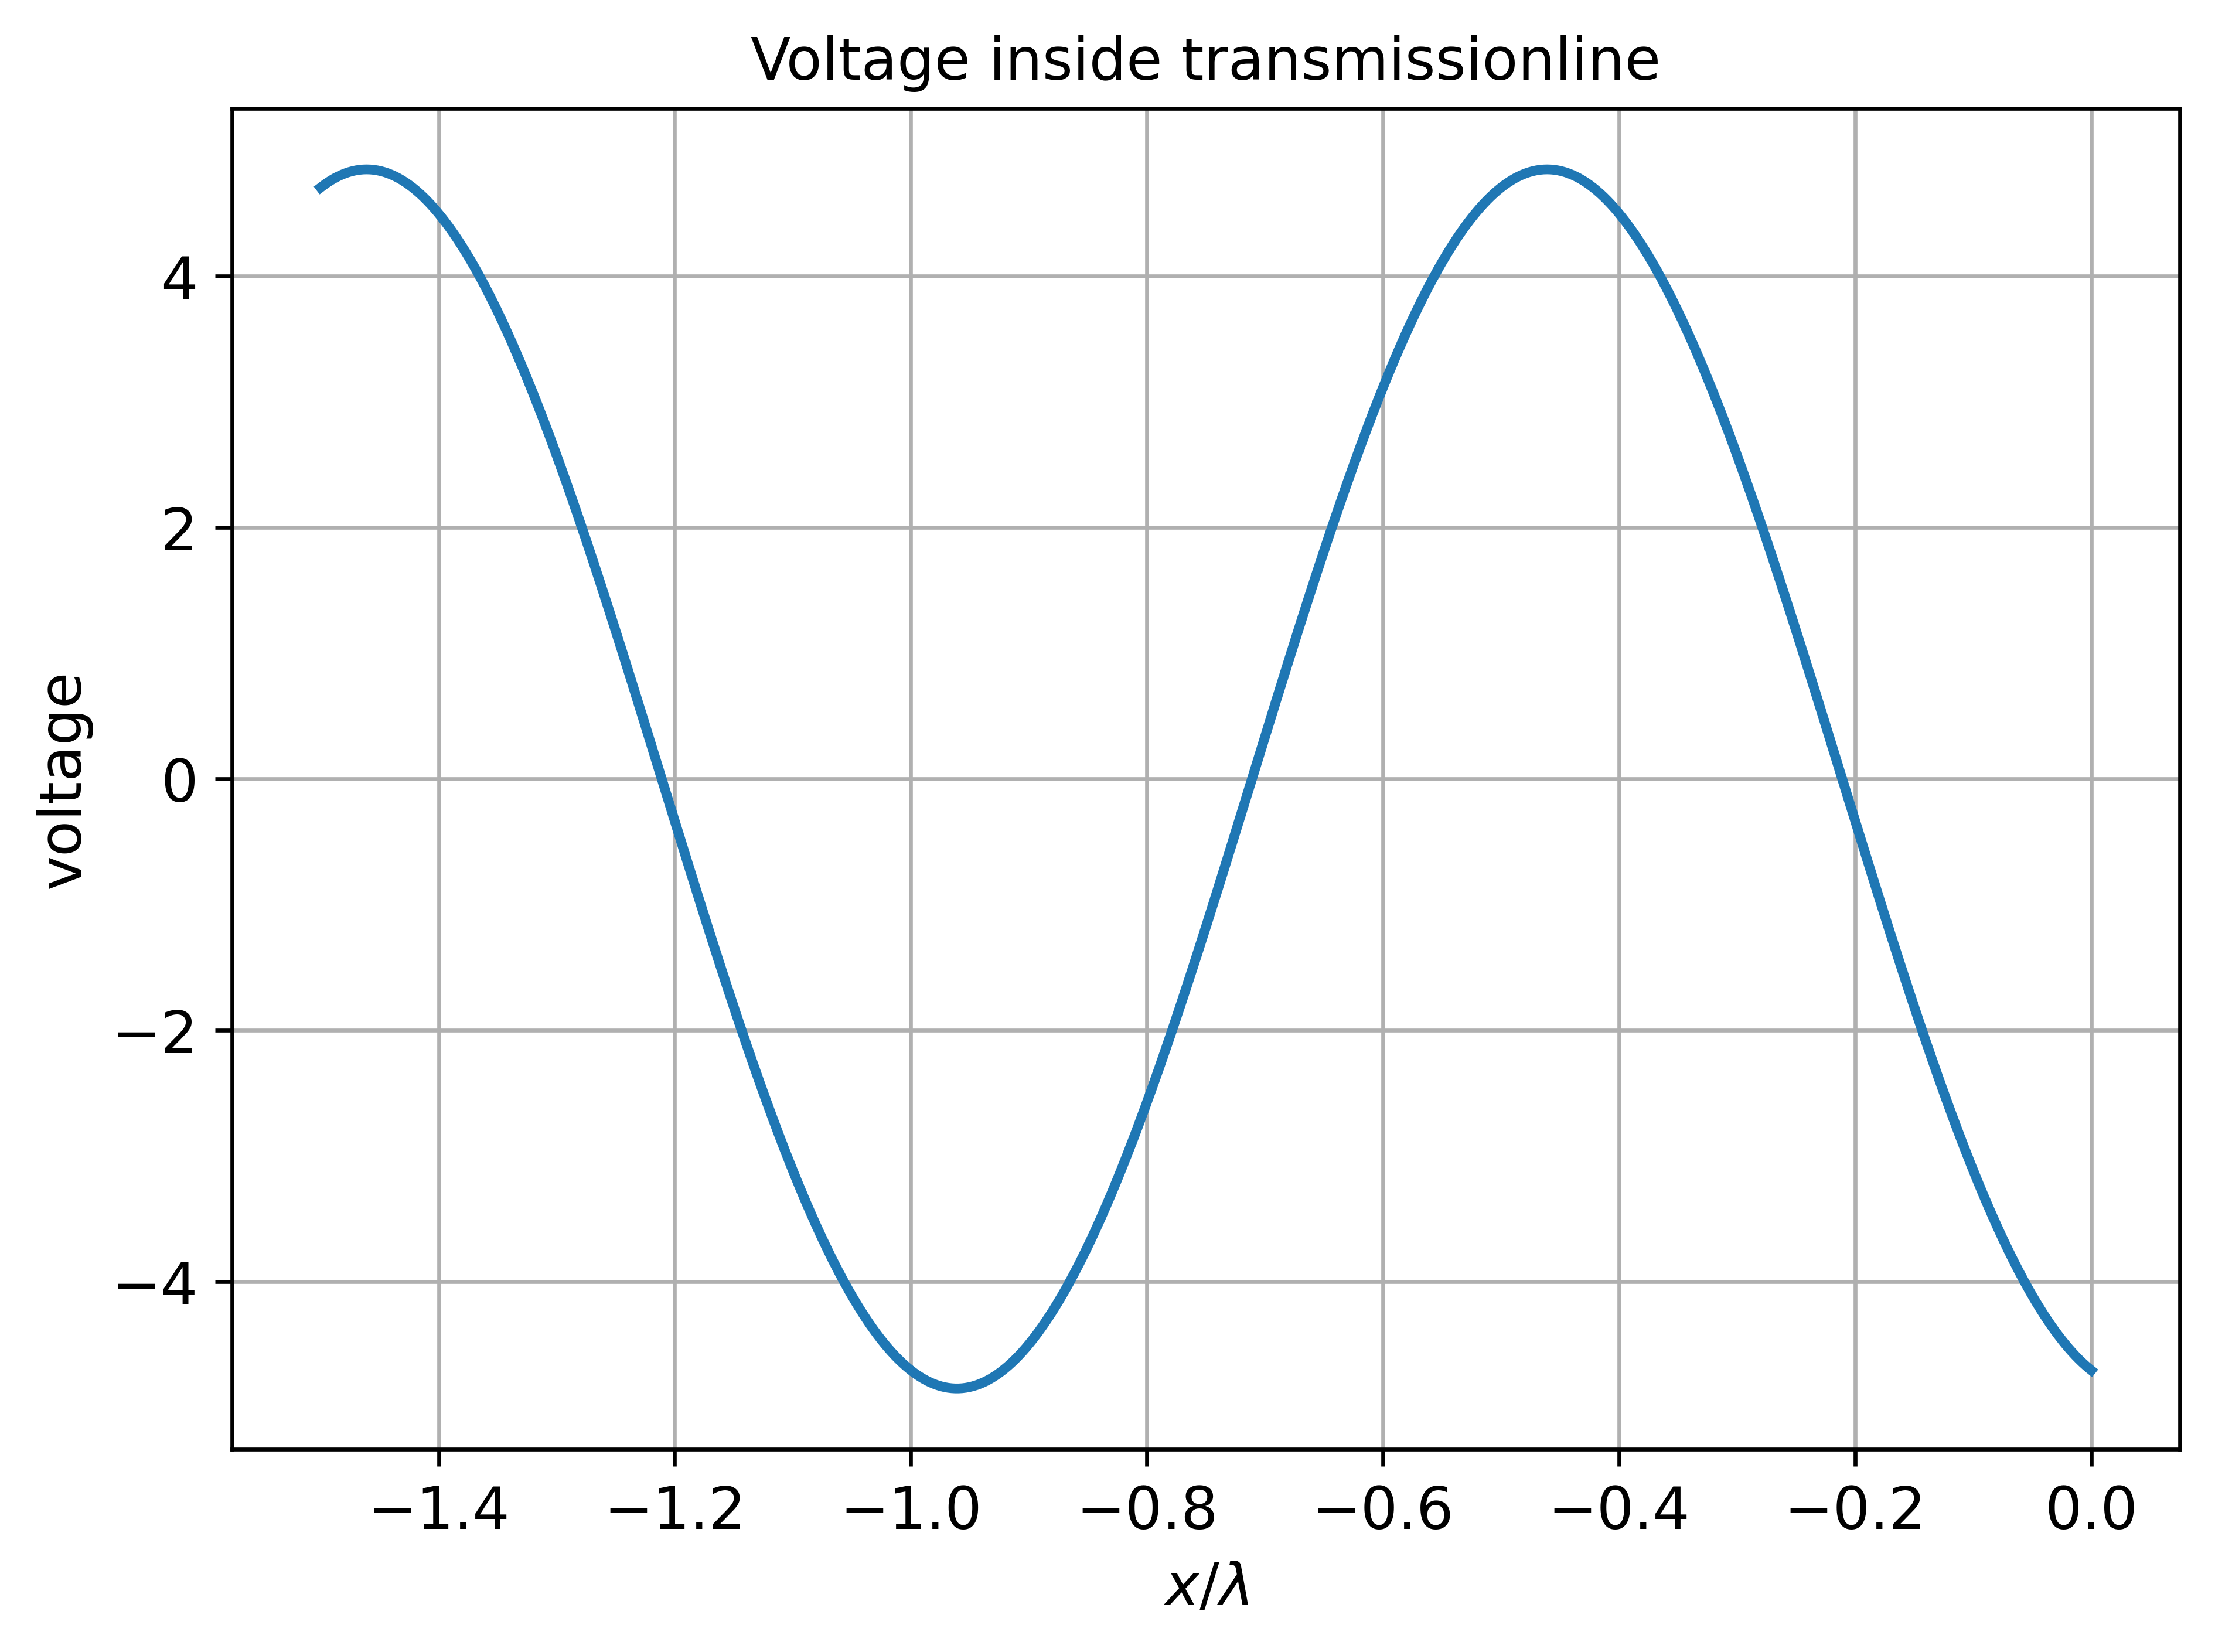

In [44]:
# Constants
V_g = 10
Z_g = 100
Z_L = 80-40j
Z_0 = 100
beta_l = 1.5 * 2 * np.pi

Gamma_L = (Z_L - Z_0) / (Z_L + Z_0)
Gamma_g = (Z_g - Z_0) / (Z_g + Z_0)
V_positive = V_g * Z_0 / (Z_0 + Z_g) * np.exp(-beta_l * 1j) / (1 - Gamma_L * Gamma_g * np.exp(-2j * beta_l))

x_array = np.linspace(-1.5, 0, 1000)
V_array = (V_positive * (np.exp(-2j * np.pi * x_array) + Gamma_L * np.exp(2j * np.pi * x_array))).real

# plot
plt.figure(dpi=600)
plt.plot(x_array, V_array, linewidth=2)
plt.xlabel('$x/\lambda$', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('voltage', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Voltage inside transmissionline', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

## LAB 1
![](LAB1.png "Real part of S11 at impedance matched, short circuit and open circuit")